In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyphare.pharesee.run import Run
from pyphare.pharesee.hierarchy import hierarchy_utils

%matplotlib widget

In [2]:
run_path = os.path.join(os.curdir, "nCheck_1d")
time = 0.0

In [3]:
r = Run(run_path)

In [4]:
h1 = r.GetMassDensity(time)
h2 = r.GetNi(time)

In [5]:
def densityMain(x):
    return 1.0

def densityBeam(x):
    L = 20.
    u = x/L-0.5
    return np.exp(-u**2)

masses = (2, 3)
charges = (1, 2)

In [6]:
def expected_mass_density_func(x, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(masses) == len(densities)
    funcs  = np.zeros((x.size, len(masses)))

    for i, (mass, density) in enumerate(zip(masses, densities)):
        funcs[:,i] = mass*density(x)
    
    return funcs.sum(axis=1)

In [15]:
def expected_charge_density_func(x, **kwargs):
    charges = kwargs["charges"]     # list of float : the ion pop charges
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(charges) == len(densities)

    funcs  = np.zeros((x.size, len(charges)))

    for i, (charge, density) in enumerate(zip(charges, densities)):
        funcs[:,i] = charge*density(x)
    
    return funcs.sum(axis=1)

In [16]:
def hierarchy_fromfunc(func, hier, **kwargs):
    from pyphare.pharesee.hierarchy.hierarchy_utils import compute_hier_from

    def compute_(patch_datas, **kwargs):
        ref_name = next(iter(patch_datas.keys()))
        x_ = patch_datas[ref_name].x
        # print(x_)

        return (
            {"name": "value", "data": func(x_, **kwargs), "centering": patch_datas[ref_name].centerings},
        )

    return compute_hier_from(compute_, hier, **kwargs)

In [17]:
H1 = hierarchy_fromfunc(expected_mass_density_func, h1, masses=masses, densities=(densityMain, densityBeam))

In [18]:
H2 = hierarchy_fromfunc(expected_charge_density_func, h2, charges=charges, densities=(densityMain, densityBeam))

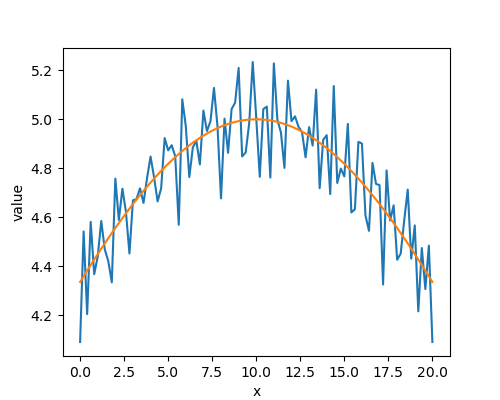

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

h1.plot(ax=ax, ls="-", lw=2.0, color=cycle[0])
H1.plot(ax=ax, ls="-", lw=2.0, color=cycle[1])

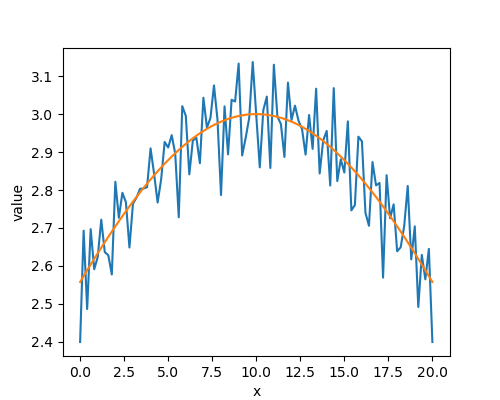

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

h2.plot(ax=ax, ls="-", lw=2.0, color=cycle[0])
H2.plot(ax=ax, ls="-", lw=2.0, color=cycle[1])

In [ ]:
# print(h)
# print(type(h))
# print(dir(h))
# print(h.times())
print(h.levels(time))
print(h.levels(time)[0])
print(dir(h.levels(time)[0]))
print(type(h.levels(time)[0].patches))
print(h.levels(time)[0].patches)
print(dir(h.levels(time)[0].patches[0]))
print(h.levels(time)[0].patches[0].patch_datas)
print(h.levels(time)[0].patches[0].patch_datas['value'])

In [ ]:
# Just to test the sum of funcs
def sigma(funcs, x):
    return sum(f(x) for f in funcs)

phi = [lambda x: x**2, lambda x: x]
x = np.array([1, 2, 3])
y = sigma(phi, x)

In [ ]:
def expected_mass_density_func(x, **kwargs):
    masses = kwargs["masses"]       # list of float : the ion pop masses
    densities = kwargs["densities"] # list of callable : the ion pop density profiles

    assert len(masses) == len(densities)

    funcs = []
    for mass, density in zip(masses, densities):
        funcs.append(lambda x: mass*density(x))

    return sum(f(x) for f in funcs)

In [ ]:
def densityMain(x):
    return 1.0

def densityBeam(x):
    L = 20
    u = x/L-0.5
    return np.exp(-u**2)

In [ ]:
def hierarchy_fromfunc(func, hier, **kwargs):
    from pyphare.pharesee.hierarchy.hierarchy_utils import compute_hier_from

    def compute_(patch_datas, **kwargs):
        ref_name = next(iter(patch_datas.keys()))
        x_ = patch_datas[ref_name].x

        return (
            {"name": "value", "data": func(x_, **kwargs), "centering": patch_datas[ref_name].centerings},
        )

    return compute_hier_from(compute_, hier, **kwargs)

In [ ]:
H = hierarchy_fromfunc(expected_mass_density_func, h, masses=(1, 1), densities=(densityMain, densityBeam))

In [ ]:
print(H.levels(time)[0].patches[0].patch_datas)

In [ ]:
Hn = hierarchy_utils.rename(H, ["rho"])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
Hn.plot(ax=ax, ls="-", lw=2.0, color=cycle[0])

In [ ]:
plt.show()

In [ ]:
# hierarchy_utils.hierarchy_compare(h, h)

In [ ]:
def _compute_sqrt(patch_datas, **kwargs):
    ref_name = next(iter(patch_datas.keys()))

    dset = np.sqrt(patch_datas["value"][:])

    return (
        {"name": "value", "data": dset, "centering": patch_datas[ref_name].centerings},
    )


In [ ]:
def zob(x):
    return sum(lambda x:x, lambda x : x^2)

In [ ]:
zob(2)

In [ ]:
def sigma(funcs, x):
    return sum(f(x) for f in funcs)

phi = [lambda x: x**2, lambda x: x]
x = np.array([1, 2, 3])
y = sigma(phi, x)

In [ ]:
y

In [ ]:
Ni = hierarchy_utils.rename(r.GetMassDensity(time), ["rho"])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
Ni.plot(ax=ax, ls="-", lw=2.0, color=cycle[0])

In [ ]:
plt.show()

In [ ]:
dir({})

In [ ]:
mass_computed = r.GetMassDensity(time)

In [ ]:
H.plot(ax=ax, ls="-", lw=2.0, color=cycle[0])

In [ ]:
Nm.level(0).patches[0].patch_datas

In [ ]:
from pyphare.pharesee.hierarchy import hierarchy_utils

In [ ]:
newN = hierarchy_utils.rename(Nm, ["rho"])

In [ ]:
newN.level(0).patches[0].patch_datas

In [ ]:
hier_computed = r.GetMassDensity(time)

In [ ]:
L = sim.simulation_domain()

In [ ]:
def densityMain(x):
    return 1.

def densityBeam(x):
    u = x/L-0.5
    return np.exp(-u**2)

m_Main = 2
m_Beam = 3

In [ ]:
def _compute_ions_mass_density_profile(patch_datas, **kwargs):
    ref_name = next(iter(patch_datas.keys()))

    x_ = patch_datas[ref_name].x
    print(type(x_), x_)
    dset = m_Main*densityMain(x_)+m_Beam*densityBeam(x_)
    
    # dset = patch_datas["value"][:]
    return ({"name": "value", "data": dset, "centering": patch_datas[ref_name].centerings},)

In [ ]:
from pyphare.pharesee.hierarchy.hierarchy_utils import compute_hier_from
hier_expected = compute_hier_from(_compute_ions_mass_density_profile, hier_computed)

In [ ]:
from pyphare.pharein import global_vars

In [ ]:
global_vars.sim